In [1]:
%matplotlib inline
# general libraries
import sys
import math
import collections
from pylab import MaxNLocator
from collections import defaultdict
import seaborn as sns # For data visualization and specifically for pairplot()
import matplotlib.pyplot as plt # For data visualization

# pandas libraries
import pandas as pd
from pandas import DataFrame
from pandas.testing import assert_frame_equal

# visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

# numpy libraries
import numpy as np
from numpy import std
from numpy import mean
from numpy import percentile

# scipy libraries
import scipy.stats as stats
from scipy.stats import kstest
from scipy.stats import normaltest

# sklearn libraries
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.experimental import enable_iterative_imputer  # explicitly require this experimental feature
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler # To transform the dataset
from sklearn.metrics import pairwise_distances # For Model evaluation
from sklearn.neighbors import NearestNeighbors # For Hyperparameter Tuning
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances # For Model evaluation
from sklearn.neighbors import NearestNeighbors # For Hyperparameter Tuning
import matplotlib.pyplot as plt

In [2]:
data_directory = (r'C:\Users\jigok\OneDrive\Desktop\UniPISA\1semestre1Anno\Data Mining\Progetto\DatasetProject1')
plot_directory = "../../plots/data_understanding/"
TR_file = data_directory + "\Cleaned_Train_HR_Employee_Attrition.csv"
TS_file = data_directory + "Test_HR_Employee_Attrition.csv"

In [4]:
df = pd.read_csv(TR_file, sep=",")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 932 entries, 0 to 931
Data columns (total 37 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Age                                     932 non-null    int64  
 1   Attrition                               932 non-null    int64  
 2   BusinessTravel_Non-Travel               932 non-null    int64  
 3   BusinessTravel_Travel_Rarely            932 non-null    int64  
 4   BusinessTravel_Travel_Frequently        932 non-null    int64  
 5   DailyRate                               932 non-null    int64  
 6   DistanceFromHome                        932 non-null    int64  
 7   Education                               932 non-null    int64  
 8   EnvironmentSatisfaction                 932 non-null    int64  
 9   Gender                                  932 non-null    int64  
 10  HourlyRate                              932 non-null    int64 

LA STANDARDIZZAZIONE DELLE VARIABILI 

Per evitare problemi legati alla diversa scala delle variabili nella pratica si usa standardizzare il dataset. La standardizzazione di una singola variabile.
Questa procedura, applicata ad ogni colonna del dataset, transforma la variabile in una variabile standardizzata (ovvero con media uguale a 0 e deviazione standard uguale a 1).

Eseguendo la standardizzazione sull'intero dataset forzeremo le variabili del dataset all'interno di un intervallo comparabile.

Istanziamo lo sklearn.StandardScaler() di sklearn per standardizzare il dataset:

In [7]:
scaler = StandardScaler()

Utilizziamo lo scaler sul dataset pulito (senza NaN):

In [9]:
scaled_array = scaler.fit_transform(df)

Lo StandardScaler() ritorna un numpy.ndarray (praticamente una matrice) che può essere inserito all'interno di un dataframe per una migliore gestione:

In [11]:
scaled_dataframe = pd.DataFrame( scaled_array, columns = df.columns )

Una volta finita la standardizzazione mostriamoil boxplot per verificare che tutto sia andato per il meglio e il DataFrame

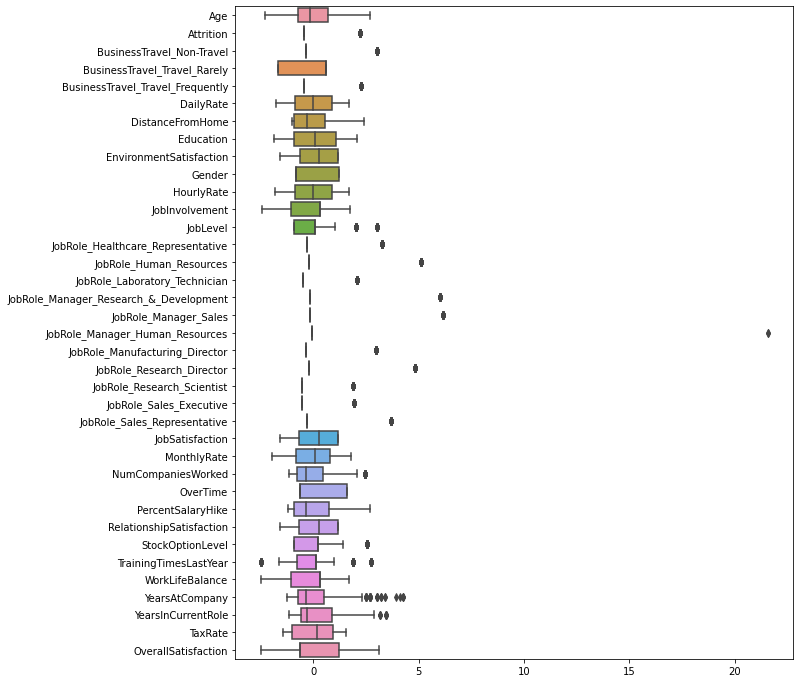

In [16]:
plt.figure(figsize = (10,12))
sns.boxplot(data = scaled_dataframe, orient = "h")
plt.show()

In [17]:
scaled_dataframe.describe()

,Age,Attrition,BusinessTravel_Non-Travel,BusinessTravel_Travel_Rarely,BusinessTravel_Travel_Frequently,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,...,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,TaxRate,OverallSatisfaction
count,9.320000e+02,9.320000e+02,9.320000e+02,9.320000e+02,9.320000e+02,9.320000e+02,9.320000e+02,9.320000e+02,9.320000e+02,9.320000e+02,...,9.320000e+02,9.320000e+02,9.320000e+02,9.320000e+02,9.320000e+02,9.320000e+02,9.320000e+02,9.320000e+02,9.320000e+02,9.320000e+02
mean,-2.932799e-16,3.229415e-16,-8.457708e-18,3.945342e-16,2.830354e-16,-2.787470e-17,-3.966784e-17,6.200334e-17,-8.219462e-17,-6.885289e-17,...,-1.567654e-16,-1.200756e-16,-1.199565e-16,1.453296e-17,-2.260352e-17,1.829724e-16,-3.192487e-17,-7.671498e-17,-3.081405e-16,7.337955e-17
std,1.000537e+00,1.000537e+00,1.000537e+00,1.000537e+00,1.000537e+00,1.000537e+00,1.000537e+00,1.000537e+00,1.000537e+00,1.000537e+00,...,1.000537e+00,1.000537e+00,1.000537e+00,1.000537e+00,1.000537e+00,1.000537e+00,1.000537e+00,1.000537e+00,1.000537e+00,1.000537e+00
min,-2.281096e+00,-4.483647e-01,-3.309438e-01,-1.683862e+00,-4.397066e-01,-1.753569e+00,-1.010533e+00,-1.870968e+00,-1.549081e+00,-8.005280e-01,...,-6.253357e-01,-1.176635e+00,-1.586707e+00,-9.107747e-01,-2.492896e+00,-2.462471e+00,-1.247136e+00,-1.148476e+00,-1.435080e+00,-2.470059e+00
25%,-7.392406e-01,-4.483647e-01,-3.309438e-01,-1.683862e+00,-4.397066e-01,-8.546107e-01,-8.883621e-01,-8.846883e-01,-6.376267e-01,-8.005280e-01,...,-6.253357e-01,-8.987979e-01,-6.618722e-01,-9.107747e-01,-7.486175e-01,-1.072390e+00,-7.120749e-01,-5.712964e-01,-1.003964e+00,-6.105316e-01
50%,-1.462192e-01,-4.483647e-01,-3.309438e-01,5.938729e-01,-4.397066e-01,-8.676963e-03,-2.775066e-01,1.015910e-01,2.738274e-01,-8.005280e-01,...,-6.253357e-01,-3.431232e-01,2.629627e-01,2.488455e-01,1.235219e-01,3.176901e-01,-3.553677e-01,-2.827066e-01,1.796458e-01,-6.105316e-01
75%,6.840107e-01,-4.483647e-01,-3.309438e-01,5.938729e-01,-4.397066e-01,9.149446e-01,5.776910e-01,1.087870e+00,1.185281e+00,1.249176e+00,...,1.599141e+00,7.682263e-01,1.187798e+00,2.488455e-01,1.235219e-01,3.176901e-01,5.364004e-01,8.716528e-01,9.478165e-01,1.248996e+00
max,2.700283e+00,2.230327e+00,3.021661e+00,5.938729e-01,2.274244e+00,1.691822e+00,2.410257e+00,2.074150e+00,1.185281e+00,1.249176e+00,...,1.599141e+00,2.713088e+00,1.187798e+00,2.568086e+00,2.739940e+00,1.707771e+00,4.281827e+00,3.468961e+00,1.543541e+00,3.108524e+00


Perfetto! Tutte le variabili hanno media molto vicina allo 0 e deviazione standard vicina a 1. La standardizzazione ha funzionato e adesso risultano confrontabili per il DBSCAN.


DBSCAN

Il DBSCAN è un algoritmo di clustering che fa parte della categoria dei cosiddetti density-based perchè non fa altro che individuare zone dello spazio delle feature in cui la densità dei punti (o osservazioni) è maggiore.

Tutte quelle osservazioni vicine tra loro vengono raggruppate in un cluster. Quelle che invece sembrano isolate sono etichettate come noise o rumore.

Il DBSCAN necessita di due iperparametri:

ε : che corrisponde alla distanza all'interno della quale ricercare punti vicini
n : che corrisponde al numero minimo di punti affinchè si formi un cluster
Per brevità possiamo dire che il DBSCAN non fa altro che cercare tutti quei cluster i cui punti sono un numero maggiore o uguale adne distanti tra loro meno di ε.

Adesso che abbiamo capito cosa fa il DBSCAN possiamo istanziare il modello tramite sklearn. Per scopi dimostrativi in queste prime righe proviamo due iperparametri ε encasuali:

In [103]:
# Compute DBSCAN
dbscan = DBSCAN(eps=6, min_samples=5).fit(scaled_dataframe)

labels = dbscan.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 6
Estimated number of noise points: 47


L'algoritmo ha identificato 6 cluster (0,1,2,3,4,5) e alcuni noise points (-1),ecco le etichette dei cluster identificati:

In [105]:
 dbscan.labels_


array([ 0,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  1,  2,  2,  0,  2,  2,
        2,  2,  2,  2,  2,  2,  1,  2,  2,  2,  2,  2,  3,  2, -1, -1,  2,
        2,  2,  2,  2,  0,  2,  2,  2, -1,  2,  2,  0,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  1,  2,  2,  2,  0,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  1,  2, -1,  2,  3,  2,  3,  2,  2,  2,  2,  2,
       -1,  2,  2,  2,  2,  2,  2,  0, -1,  2,  2,  2,  2,  2,  2,  2,  2,
        0,  2,  0,  2,  2,  2,  2,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  3,  2,  2,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  3, -1,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2, -1,  2,  2,  2,  2,  2,  2,  2,  2,  2,
       -1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  2,  2,
        2,  2,  2,  2,  0,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  0,  2,  2,  4,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2

In [142]:
scaled_dataframe["LABEL"] = labels

In [143]:
np.unique(dbscan.labels_,return_counts = True)

(array([-1,  0,  1,  2,  3,  4,  5], dtype=int64),
 array([ 47,  32,  20, 792,  25,  14,   2], dtype=int64))

E mostrando le prime 15 righe del dataset possiamo vedere i cluster assegnati alle osservazioni (colonna LABEL):

In [144]:
scaled_dataframe.head(15)

,Age,Attrition,BusinessTravel_Non-Travel,BusinessTravel_Travel_Rarely,BusinessTravel_Travel_Frequently,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,TaxRate,OverallSatisfaction,LABEL
0,1.751449,-0.448365,-0.330944,0.593873,-0.439707,-0.542626,-0.033164,1.087870,-0.637627,-0.800528,...,0.490389,0.262963,-0.910775,-0.748618,-1.072390,0.179693,0.871653,-0.212278,-0.610532,0
1,-0.146219,-0.448365,-0.330944,0.593873,-0.439707,0.998798,-1.010533,-1.870968,-0.637627,-0.800528,...,-0.343123,0.262963,0.248846,0.123522,0.317690,-1.068782,1.160243,-0.149570,-0.610532,1
2,-1.688075,-0.448365,-0.330944,-1.683862,2.274244,-0.698002,0.822033,0.101591,0.273827,-0.800528,...,2.713088,0.262963,0.248846,0.995661,0.317690,-1.068782,0.294473,0.759693,1.248996,2
3,-0.502032,-0.448365,-0.330944,0.593873,-0.439707,0.345234,-0.521849,1.087870,-0.637627,-0.800528,...,-0.343123,-0.661872,-0.910775,-1.620757,0.317690,-0.712075,0.871653,1.198648,-0.610532,2
4,-0.264823,-0.448365,-0.330944,0.593873,-0.439707,1.398335,-0.033164,-0.884688,0.273827,1.249176,...,-0.898798,0.262963,-0.910775,0.123522,0.317690,0.536400,-0.571296,-0.776648,1.248996,2
5,-0.264823,-0.448365,-0.330944,0.593873,-0.439707,-0.295998,-0.277507,0.101591,1.185281,-0.800528,...,-1.176635,1.187798,2.568086,-0.748618,0.317690,-1.068782,-0.571296,1.261356,1.248996,2
6,-1.213658,-0.448365,-0.330944,0.593873,-0.439707,1.450127,-0.644020,-0.884688,0.273827,-0.800528,...,-1.176635,-1.586707,0.248846,-2.492896,0.317690,0.358047,-0.282707,0.383446,-0.610532,2
7,-1.688075,-0.448365,-0.330944,-1.683862,2.274244,1.472324,-0.766191,-1.870968,1.185281,-0.800528,...,1.323901,-0.661872,1.408466,0.123522,0.317690,-1.068782,0.294473,1.355417,1.248996,2
8,-2.043888,-0.448365,-0.330944,-1.683862,2.274244,1.053056,-0.888362,1.087870,1.185281,1.249176,...,-0.620961,1.187798,0.248846,0.123522,0.317690,-0.890429,-1.148476,1.324063,1.248996,2
9,1.395636,-0.448365,-0.330944,0.593873,-0.439707,0.253982,0.944204,-0.884688,1.185281,-0.800528,...,-0.620961,0.262963,-0.910775,-0.748618,0.317690,-0.712075,-0.571296,1.230002,1.248996,2


Proviamo a mostrare degli scatterplot tra alcune variabili utilizzando matplotlib e seaborn

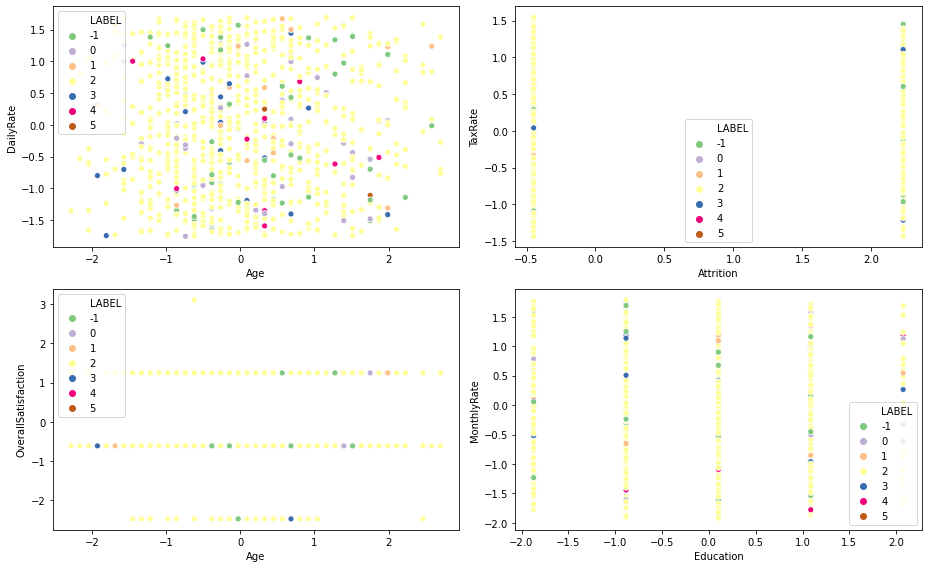

In [145]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (13,8))

sns.scatterplot(x = "Age", y = "DailyRate", data = scaled_dataframe, hue = "LABEL", palette = "Accent", ax = ax1)
sns.scatterplot(x = "Attrition", y = "TaxRate", data = scaled_dataframe, hue = "LABEL", palette = "Accent", ax = ax2)
sns.scatterplot(x = "Age", y = "OverallSatisfaction", data = scaled_dataframe, hue = "LABEL", palette = "Accent", ax = ax3)
sns.scatterplot(x = "Education", y = "MonthlyRate", data = scaled_dataframe, hue = "LABEL", palette = "Accent", ax = ax4)

plt.tight_layout()
plt.show()

Ora determino l'Esp e il MinSamples facendo il grafico ed utilizzando la distanza euclidea come paramentro

In [41]:
from scipy.spatial.distance import pdist,squareform

In [146]:
dist = pdist(scaled_dataframe,'euclidean')
dist = squareform(dist)
print(dist)

[[ 0.         10.48562866 10.194737   ...  9.25699304  8.68224631
   9.65569042]
 [10.48562866  0.          9.90125118 ...  9.27390906 10.02090146
  11.0820836 ]
 [10.194737    9.90125118  0.         ...  8.26349161  8.16813475
   8.57332714]
 ...
 [ 9.25699304  9.27390906  8.26349161 ...  0.          7.37026322
   9.57060798]
 [ 8.68224631 10.02090146  8.16813475 ...  7.37026322  0.
   8.55917597]
 [ 9.65569042 11.0820836   8.57332714 ...  9.57060798  8.55917597
   0.        ]]


In [149]:
k = 5
kth_distance =[]
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distance.append(d[index_kth_distance])

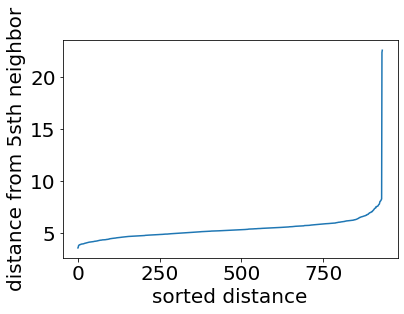

In [150]:
plt.plot(range(0,len(kth_distance)), sorted(kth_distance))
plt.ylabel('distance from 5sth neighbor',fontsize = 20)
plt.xlabel('sorted distance',fontsize = 20)

plt.tick_params(axis ='both', labelsize =20)

Il miglior modo per valutare le performance di un modello è osservare come cambiano le metriche al variare dei suoi iperparametri. Definiamo il set di iperparametri da provare:

In [172]:
eps_to_test = [round(eps,1) for eps in np.arange(1, 10, 1)]
min_samples_to_test = range(5, 50, 5)

print("EPS:", eps_to_test)
print("MIN_SAMPLES:", list(min_samples_to_test))

EPS: [1, 2, 3, 4, 5, 6, 7, 8, 9]
MIN_SAMPLES: [5, 10, 15, 20, 25, 30, 35, 40, 45]


Dato che il DBSCAN si preoccupa poco della forma del cluster l'utilizzo di una metrica come l'indice di Silhouette sarebbe inappropriato. Proprio per questo motivo possiamo provare a creare un paio di metriche home-made per avere contezza di come va la clusterizzazione con la combinazione di iperparametri imposti.

Verrà eseguita prima la clusterizzazione e poi il calcolo delle metriche. Ad esempio potremmo utilizzare:

Distanza media tra i noise points e i 6 punti più vicini (6-NN)
Numero di cluster che vengono individuati
Scriviamo quanto detto all'interno della funzione get_metric() che, una volta all'interno del grid search, si occuperà di restituire automaticamente le metriche ad ogni combinazione di iperparametri:

In [173]:
def get_metrics(eps, min_samples, dataset, iter_):
    
    # Fitting ======================================================================
    
    dbscan = DBSCAN( eps = eps, min_samples = min_samples)
    dbscan.fit(dataset)
    
    # Mean Noise Point Distance metric =============================================
    noise_indices = dbscan.labels_ == -1
    
    if True in noise_indices:
        neighboors = NearestNeighbors(n_neighbors = 6).fit(dataset)
        distances, indices = neighboors.kneighbors(dataset)
        noise_distances = distances[noise_indices, 1:]
        noise_mean_distance = round(noise_distances.mean(), 3)
    else:
        noise_mean_distance = None
        
    # Number of found Clusters metric ==============================================
    
    number_of_clusters = len(set(dbscan.labels_[dbscan.labels_ >= 0]))
    
    # Log ==========================================================================
    
    print("%3d | Tested with eps = %3s and min_samples = %3s | %5s %4s" % (iter_, eps, min_samples, str(noise_mean_distance), number_of_clusters))
        
    return(noise_mean_distance, number_of_clusters)

Istanziamo i due dataframe che conterranno i risultati del grid search:

In [174]:
# Dataframe per la metrica sulla distanza media dei noise points dai K punti più vicini
results_noise = pd.DataFrame( 
    data = np.zeros((len(eps_to_test),len(min_samples_to_test))), # Empty dataframe
    columns = min_samples_to_test, 
    index = eps_to_test
)

# Dataframe per la metrica sul numero di cluster
results_clusters = pd.DataFrame( 
    data = np.zeros((len(eps_to_test),len(min_samples_to_test))), # Empty dataframe
    columns = min_samples_to_test, 
    index = eps_to_test
)

In [175]:
iter_ = 0

print("ITER| INFO%s |  DIST    CLUS" % (" "*39))
print("-"*65)

for eps in eps_to_test:
    for min_samples in min_samples_to_test:
        
        iter_ += 1
        
        # Calcolo le metriche
        noise_metric, cluster_metric = get_metrics(eps, min_samples,scaled_dataframe, iter_)
        
        # Inserisco i risultati nei relativi dataframe
        results_noise.loc[eps, min_samples] = noise_metric
        results_clusters.loc[eps, min_samples] = cluster_metric

ITER| INFO                                        |  DIST    CLUS
-----------------------------------------------------------------
  1 | Tested with eps =   1 and min_samples =   5 | 5.055    0
  2 | Tested with eps =   1 and min_samples =  10 | 5.055    0
  3 | Tested with eps =   1 and min_samples =  15 | 5.055    0
  4 | Tested with eps =   1 and min_samples =  20 | 5.055    0
  5 | Tested with eps =   1 and min_samples =  25 | 5.055    0
  6 | Tested with eps =   1 and min_samples =  30 | 5.055    0
  7 | Tested with eps =   1 and min_samples =  35 | 5.055    0
  8 | Tested with eps =   1 and min_samples =  40 | 5.055    0
  9 | Tested with eps =   1 and min_samples =  45 | 5.055    0
 10 | Tested with eps =   2 and min_samples =   5 | 5.055    0
 11 | Tested with eps =   2 and min_samples =  10 | 5.055    0
 12 | Tested with eps =   2 and min_samples =  15 | 5.055    0
 13 | Tested with eps =   2 and min_samples =  20 | 5.055    0
 14 | Tested with eps =   2 and min_samples =  25

Mostriamo i risultati del grid search appena eseguito per cercare la "miglior" combinazione di iperparametri:

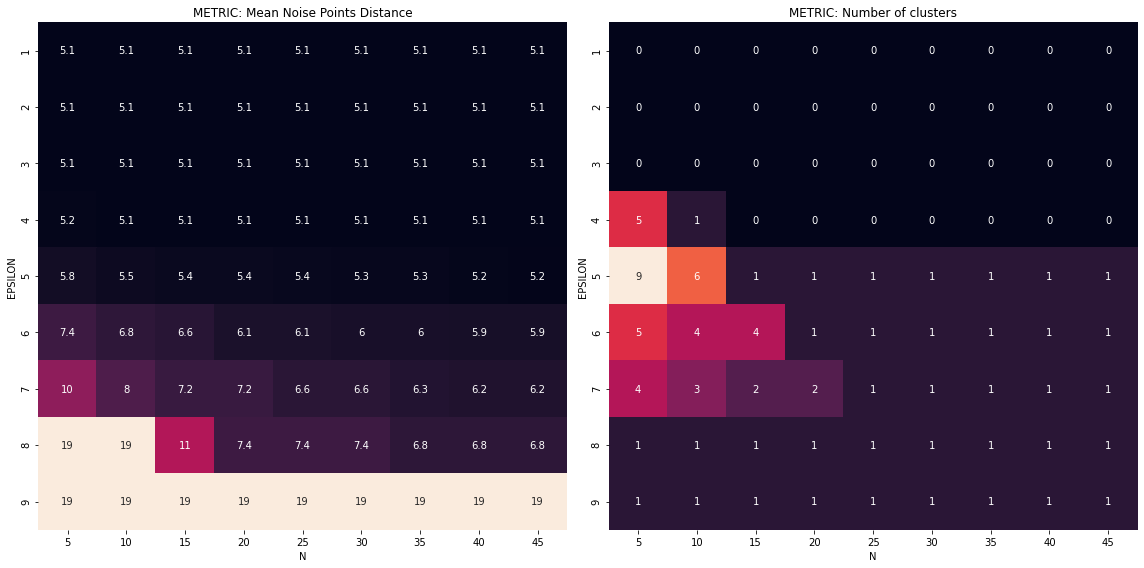

In [176]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8) )

sns.heatmap(results_noise, annot = True, ax = ax1, cbar = False).set_title("METRIC: Mean Noise Points Distance")
sns.heatmap(results_clusters, annot = True, ax = ax2, cbar = False).set_title("METRIC: Number of clusters")

ax1.set_xlabel("N"); ax2.set_xlabel("N")
ax1.set_ylabel("EPSILON"); ax2.set_ylabel("EPSILON")

plt.tight_layout(); plt.show()

Analizzando le due heatmap ci accorgiamo subito che per bassi valori di ε praticamente tutti i punti vengono identificati come noise points (0 cluster). Viceversa, per alti valori di ε tendiamo ad avere un solo cluster.

Probabilmente, sul nostro dataset di partenza ha senso trovare non più di 4 cluster.

Scegliamo allora n=7 ed ε=5.0 che ci restituiscono mediamente dei noise points più distanti.

E adesso vediamo come performa questo "miglior" modello:

In [177]:
# Istantiating with eps = 7 and min_samples = 5 (best model)
best_dbscan_model = DBSCAN( eps = 7, min_samples = 5)

# Fitting
best_dbscan_model.fit(scaled_dataframe)

# Extracting labels
scaled_dataframe["LABEL"] = best_dbscan_model.labels_

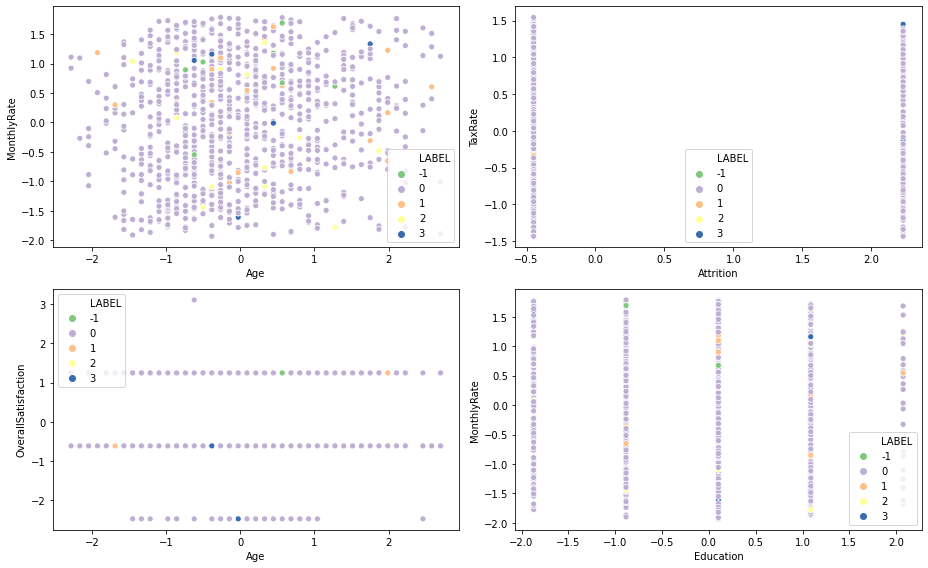

In [178]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (13,8))

sns.scatterplot(x = "Age", y = "MonthlyRate", data = scaled_dataframe, hue = "LABEL", palette = "Accent", ax = ax1)
sns.scatterplot(x = "Attrition", y = "TaxRate", data = scaled_dataframe, hue = "LABEL", palette = "Accent", ax = ax2)
sns.scatterplot(x = "Age", y = "OverallSatisfaction", data = scaled_dataframe, hue = "LABEL", palette = "Accent", ax = ax3)
sns.scatterplot(x = "Education", y = "MonthlyRate", data = scaled_dataframe, hue = "LABEL", palette = "Accent", ax = ax4)

plt.tight_layout()
plt.show()